Kinship maps NUTS1 regions - where were KIN born? Where do kin live?  
12 grid maps proportion from each NUTS (born, live)

1 NUTS1 map with pie charts for each region (born, live) (unweighted, weighted)  
1 NUTS1 map with connections (born, live) (unweighted, weighted)  

1 NUTS1 - NUTS1 column connections (born, live) (unweighted, weighted)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Image
import math

In [2]:
# specify nuts colors
def get_nuts1_colors():
    nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM', 'UKN']
    nuts1_color_dict = {}
    nuts1_color_list = []
    f = open('../02_maps_qgis/12cols.txt','r')
    needCols = True
    i = 0
    for line in f:
        line = line.rstrip()
        if line.startswith('#'):
            needCols = True
        elif needCols == True:
            rgb = [int(x) for x in line.split()[:3]]
            rgb = [x/255 for x in rgb]
            nuts1_color_dict[nuts1[i]] = rgb
            nuts1_color_list.append(rgb)
            i += 1
    f.close()
    nuts1_color_dict = dict(zip(nuts1,nuts1_color_list))
    return nuts1_color_list, nuts1_color_dict

In [3]:
kinship = pd.read_csv('../00_csv_files/kinship_data.csv')
kinship.head(5)

,uniqID,ID1,DOB_id1,ID2,DOB_id2,HetHet,IBS0,Kinship,POB_distance,POR_distance
0,rel1,1000027,1955,3239325,1959,0.078,0.0041,0.2657,5000.000000,3162.277660
1,rel2,1000064,1947,3178357,1943,0.046,0.0138,0.0682,258791.421805,91678.787077
2,rel3,1000096,1946,4107632,1968,0.047,0.0137,0.0715,356181.133695,186601.178989
3,rel17640,1904775,1952,4107632,1968,0.048,0.0132,0.0782,52086.466572,181515.839529
4,rel4,1000132,1944,2772375,1949,0.055,0.0085,0.1380,0.000000,31048.349393


In [4]:
# from a kinship dataframe (or slice), make dictionary: kinDict[eid] = [list,of,kin]
def kindf_to_kindict(df):
    id1 = df.ID1.values.tolist()
    id2 = df.ID2.values.tolist()
    kinDict = {}
    
    for i,id in enumerate(id1):
        kin = id2[i]
        if id in kinDict.keys():
            kinDict[id].append(kin)
        else:
            kinDict[id] = [kin]
            
    for i,id in enumerate(id2):
        kin = id1[i]
        if id in kinDict.keys():
            kinDict[id].append(kin)
        else:
            kinDict[id] = [kin]
    
    return kinDict

In [5]:
kinDict = kindf_to_kindict(kinship)
print(len(kinDict))

135604


In [6]:
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
eid_data.head(5)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618
2,4778319,11005,1946,798500,66500,UKM64,775,323000.0,669000.0,UKM25,3959
3,2797312,11011,1949,842500,79500,UKM64,892,358000.0,171000.0,UKK11,4375
4,3735126,11002,1948,842500,79500,UKM64,892,459000.0,205000.0,UKJ14,5592


In [7]:
nuts3_corrections = pd.read_csv('../00_csv_files/nuts3_sampling_corrections.csv')
nuts1_corrections = pd.read_csv('../00_csv_files/nuts1_sampling_corrections.csv')
nuts3_weightDict = dict(zip(nuts3_corrections.NUTS_ID,nuts3_corrections.weighting))
nuts3_corrections.head(5)

,NUTS_ID,ukb_points,census_pops,frac_sampled,weighting
0,UKM64,164,27685,0.005924,5.336702
1,UKM27,974,236900,0.004111,7.689151
2,UKK43,1869,746400,0.002504,12.625093
3,UKH14,1217,728165,0.001671,18.915224
4,UKK41,1013,256385,0.003951,8.001206


In [8]:
# function to get distances between coordinates
def dist_between_points(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    return math.hypot(x2-x1, y2-y1)

In [9]:
# load 10k grid centroids and ids
grid = pd.read_csv('../00_csv_files/10km_grid_with_ukb_points.csv')
grid.head(5)

,gridID,X,Y,POBcount,PORcount
0,774,64917.76409,803641.428192,1,0
1,775,64917.76409,793641.428192,2,0
2,892,74917.76409,843641.428192,9,0
3,893,74917.76409,833641.428192,10,0
4,894,74917.76409,823641.428192,1,0


In [10]:
# make dictionaries of grid coordinates
gridx = dict(zip(grid.gridID,grid.X))
gridy = dict(zip(grid.gridID,grid.Y))

## GRID maps: make csv for QGIS
12 **grid** maps proportion from each NUTS (born, live)  
proportion in each NUTS1 ID for each grid.   
gridID,x,y,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,UKL,UKM,UKN,TopRegion,2ndRegion (and again for weighted)  
#### This takes awhile ... and is DONE. shouldn't need to run again.

In [139]:
# select pob or por
placeType = 'por' # 'pob' or 'por'

if placeType == 'pob':
    nutsCol = 'POB_NUTSID'
    gridCol = 'POB_gridID'
else:
    nutsCol = 'POR_NUTSID'
    gridCol = 'POR_gridID'
    
eid_grid = dict(zip(eid_data.eid,eid_data[gridCol]))
eid_nuts = dict(zip(eid_data.eid,eid_data[nutsCol]))

# from kinship, make dictionary of gridID => [list,of,eids,in,that,grid]
grid_eids = {}
for eid in kinDict.keys():
    if eid in eid_grid.keys():
        gridID = eid_grid[eid]
        if gridID in grid_eids.keys():
            if eid not in grid_eids[gridID]:
                grid_eids[gridID].append(eid)
        else:
            grid_eids[gridID] = [eid]

# make dictionary of index values for nuts1 regions           
nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']
nuts1_index = {}
for i, n in enumerate(nuts1):
    nuts1_index[i]=n

# open file for saving .csv
o = open('../00_csv_files/grid_nuts1_where_kin_live_' + placeType + '.csv','w')    
    
# print header
header = ['gridID','x','y'] + nuts1 + ['top_nuts','second_nuts'] + [s + '_w' for s in nuts1] + ['top_nuts_w','second_nuts_w']
header = [str(s) for s in header]
o.write(','.join(header) + '\n')

# go through each gridID
# for each eid in that grid, find NUTS3 region of kin, add to a list (and also do corrections to keep a weighted list)
# when done collecting data for that grid, find proportions in each NUTS, find top, and find second, and print!

for gridID in grid_eids.keys():
    
    nuts_list = []
    weighted_nuts_list = []
    
    for eid in grid_eids[gridID]: # go through each eid in this grid
         
        # get weight for nuts3 region for this eid    
        nuts_this_eid = eid_nuts[eid]
        weight1 = nuts3_weightDict[nuts_this_eid]
        
        # get list of kin for this eid
        kin = kinDict[eid]
        
        # go through each kin, add nuts1 region to list for this gridID
        for k in kin:
            
            if k in eid_nuts.keys():
                nuts_kin = eid_nuts[k]
                nuts_list.append(nuts_kin[:3]) # add nuts1 region

                # weighted: calculate weighting and make corrFactor instances of nuts3 location of kin
                weight2 = nuts3_weightDict[nuts_kin]          
                corrFactor = int(np.round(weight1*weight2))           
                weighted_nuts_list.extend([nuts_kin[:3]] * corrFactor)
    
    # build lists of nuts1 proportions (unweighted)
    nuts_count_dict = {x:nuts_list.count(x) for x in nuts_list}
    nuts_count_list = np.array([nuts_count_dict[n] if n in nuts_count_dict.keys() else 0 for n in nuts1])
    nuts_count_proportions = nuts_count_list / np.sum(nuts_count_list)
    
    # (weighted)
    nuts_count_dict_weighted = {x:weighted_nuts_list.count(x) for x in weighted_nuts_list}
    nuts_count_list_weighted = np.array([nuts_count_dict_weighted[n] if n in nuts_count_dict_weighted.keys() else 0 for n in nuts1])
    nuts_count_weighted_proportions = nuts_count_list_weighted / np.sum(nuts_count_list_weighted)
    
    # get nuts1 regions with highest and second highest proportions (unweighted)
    nuts_count_order = np.flip(np.argsort(nuts_count_proportions))
    top_nuts = nuts1_index[nuts_count_order[0]]
    second_nuts = nuts1_index[nuts_count_order[1]]
    
    # (weighted)
    nuts_count_order_weighted = np.flip(np.argsort(nuts_count_weighted_proportions))
    top_nuts_weighted = nuts1_index[nuts_count_order_weighted[0]]
    second_nuts_weighted = nuts1_index[nuts_count_order_weighted[1]]
    
    # format output and print
    toPrint = [gridID,gridx[gridID],gridy[gridID]] + list(nuts_count_proportions) + [top_nuts,second_nuts]
    toPrint = toPrint + list(nuts_count_weighted_proportions) + [top_nuts_weighted,second_nuts_weighted]
    toPrint = [str(x) for x in toPrint]
    o.write(','.join(toPrint) + '\n')

o.close()

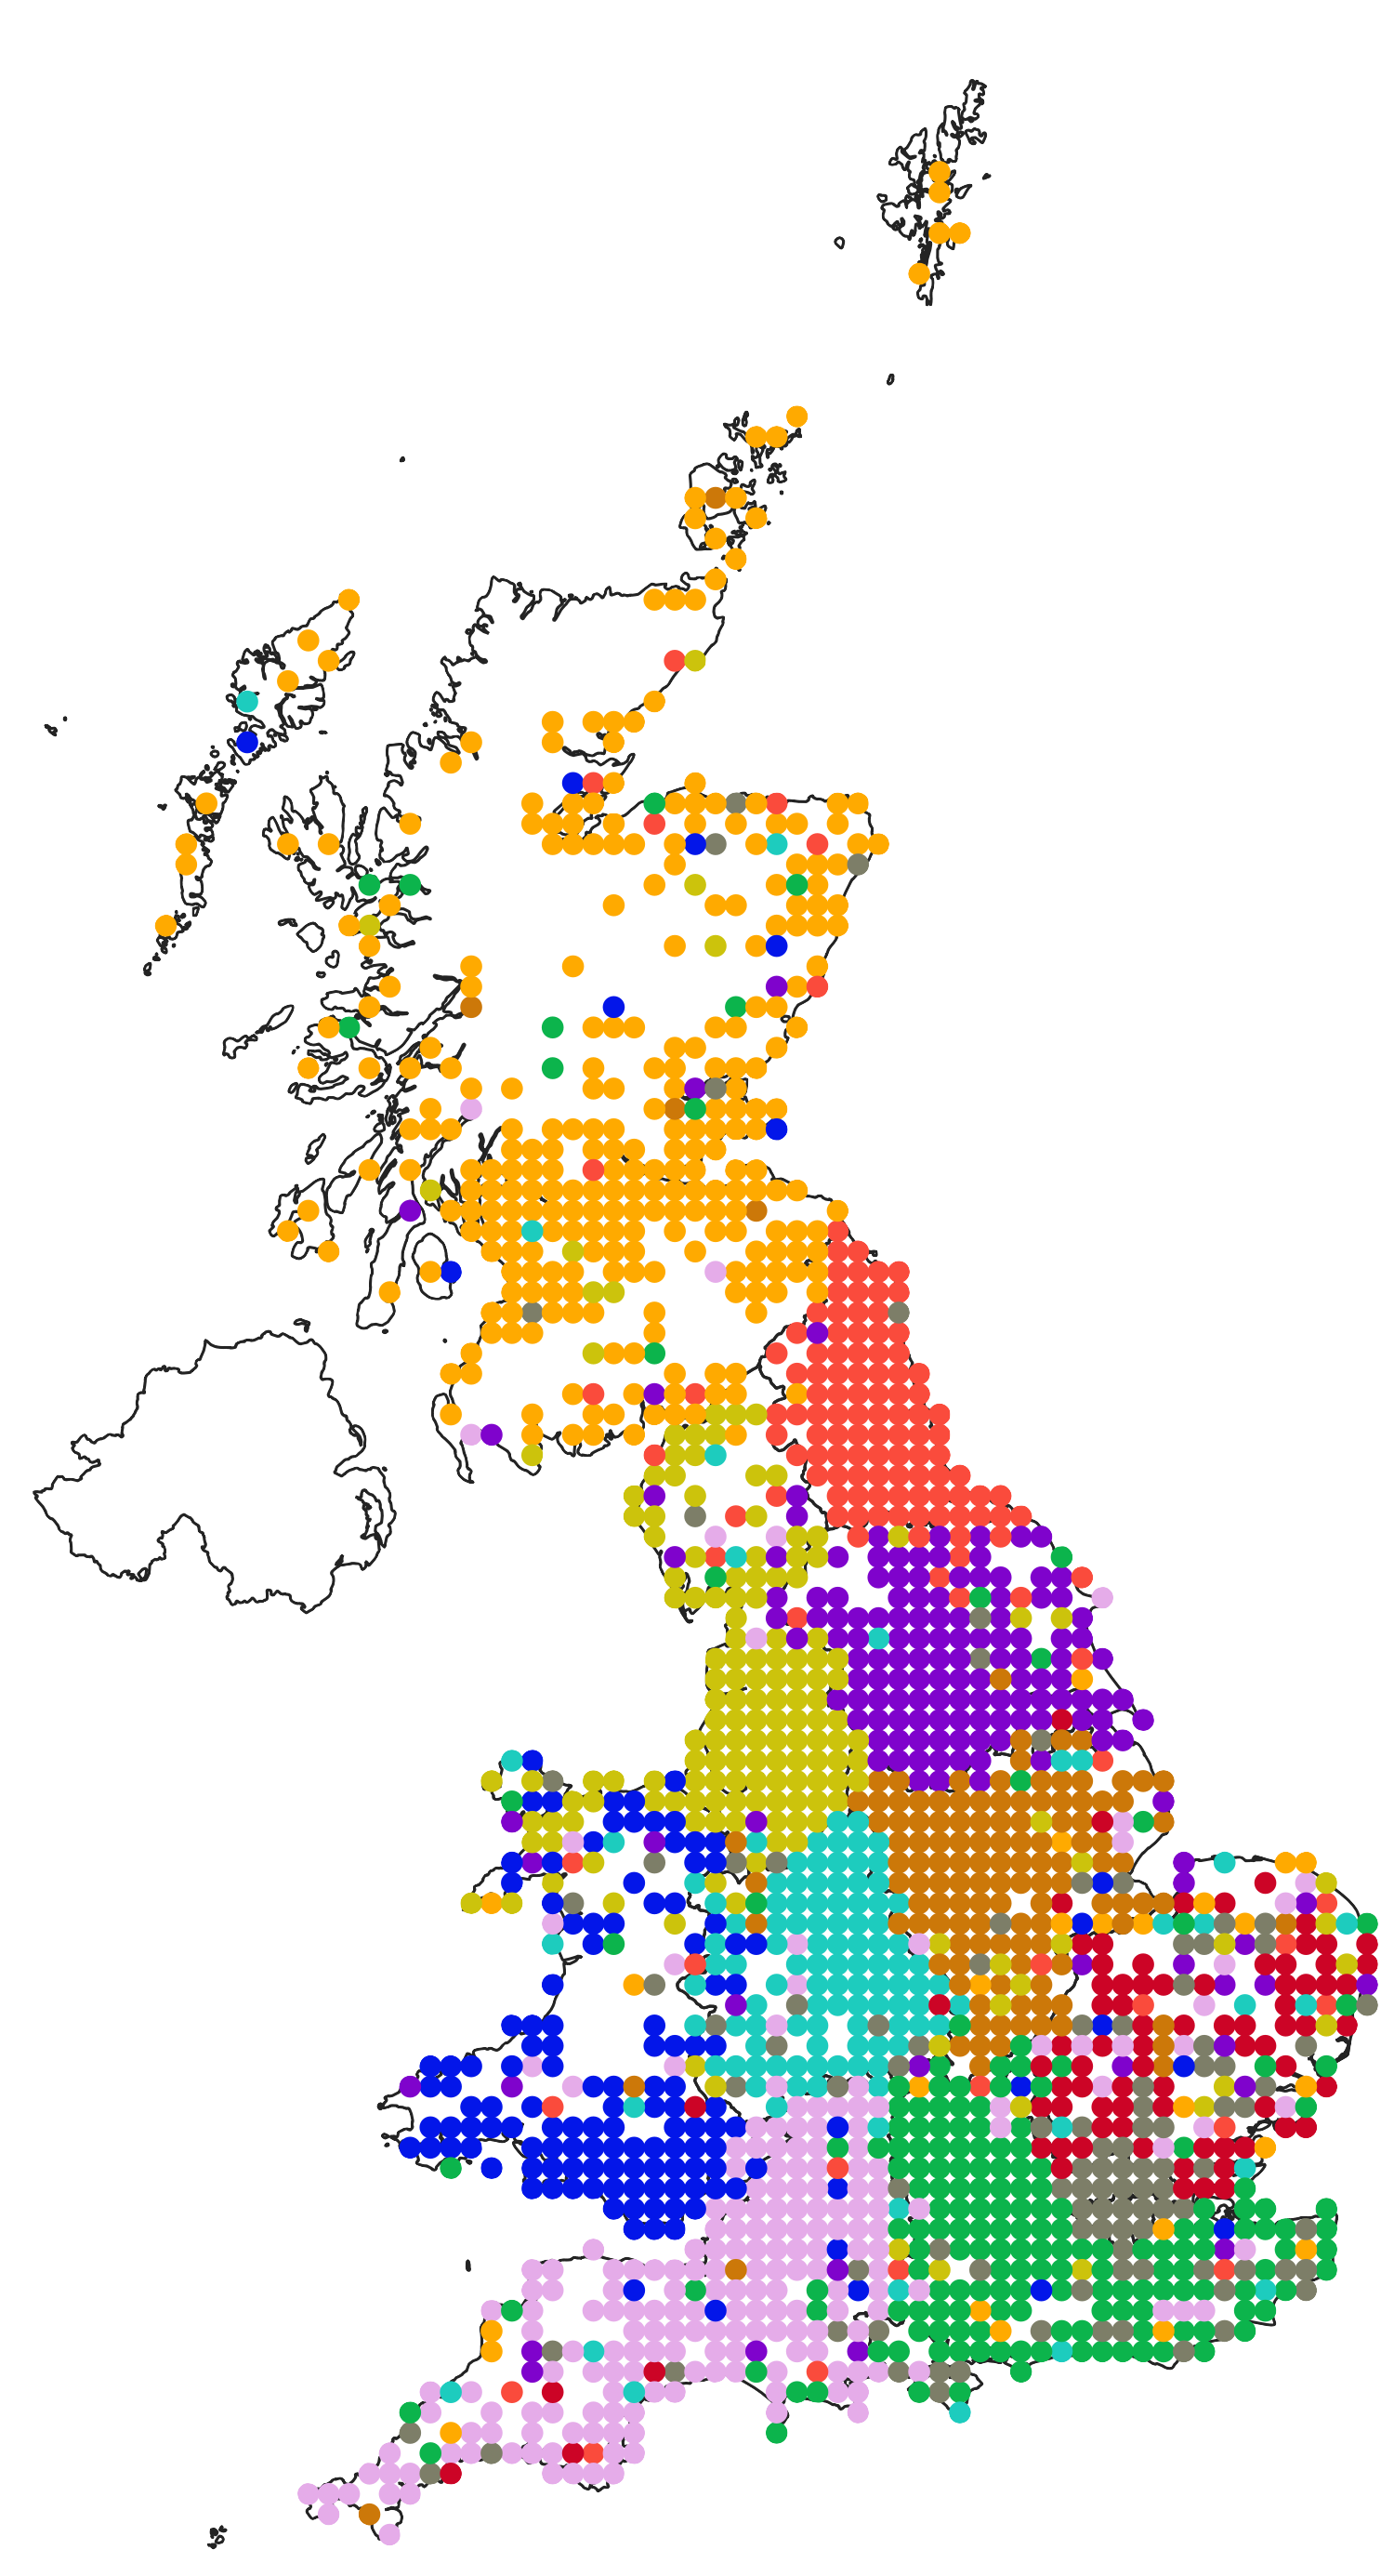

In [122]:
## example map from above: pob
Image(filename='../01_images_figures/where_were_kin_born_nuts1_raw.png',width=400) 

# NUTS1 maps. 
1 NUTS1 map with pie charts for each region (born, live) (unweighted, weighted)  
1 NUTS1 map with connections (born, live) (unweighted, weighted)  

In [11]:
# from kinship, make dictionary of nuts_ID => [list,of,eids,in,that,grid]
# takes ~20 s

# select pob or por
placeType = 'pob' # 'pob' or 'por'a

if placeType == 'pob':
    nutsCol = 'POB_NUTSID'
    gridCol = 'POB_gridID'
else:
    nutsCol = 'POR_NUTSID'
    gridCol = 'POR_gridID'
    
eid_grid = dict(zip(eid_data.eid,eid_data[gridCol]))
eid_nuts = dict(zip(eid_data.eid,eid_data[nutsCol]))

nuts1_eids = {}
for eid in kinDict.keys():
    if eid in eid_nuts.keys():
        nutsID = eid_nuts[eid][:3]
        if nutsID in nuts1_eids.keys():
            if eid not in nuts1_eids[nutsID]:
                nuts1_eids[nutsID].append(eid)
        else:
            nuts1_eids[nutsID] = [eid]

In [12]:
t = 0
for n in nuts1_eids.keys():
    numHere = len(nuts1_eids[n])
    print(n,numHere)
    t += numHere
print('total: ',t)
print(len(kinDict.keys())) # some in kinship but not in eid_data, no place

UKE 20769
UKM 10906
UKG 12882
UKC 21050
UKJ 7168
UKK 10740
UKI 9200
UKD 23880
UKH 2070
UKL 6412
UKF 10503
total:  135580
135604


In [12]:
# make nuts kin dictionaries
nuts_kinRegions = {} # nuts1 region => list containing nuts1 region of each kin
nuts_kinRegions_weighted = {} # nuts1 region => list containing nuts1 region of each kin ... weighted by census

# go through each nuts1 region
for nuts in nuts1_eids.keys(): 
    
    nuts_list = [] # keep a list of nuts regions for kin (good for raw counts and proportions)
    weighted_nuts_list = [] # keep a list of WEIGHTED nuts regions for kin (only good for proportions)
    
    # go through each eid in this nuts1 region
    for eid in nuts1_eids[nuts]: 
        
        # get weight for nuts3 region for this eid    
        nuts_this_eid = eid_nuts[eid]
        weight1 = nuts3_weightDict[nuts_this_eid]
        
        # get list of kin for this eid
        kin = kinDict[eid]
        
        # go through each kin, add nuts1 region to list for this nuts1 ID
        for k in kin:
            
            if k in eid_nuts.keys():
                # unweighted: add nuts1 region of kin to nuts_list
                nuts_kin = eid_nuts[k]
                nuts_list.append(nuts_kin[:3]) # add nuts1 region

                # weighted: calculate weighting and add corrFactor instances of nuts1 location of kin
                weight2 = nuts3_weightDict[nuts_kin]          
                corrFactor = int(np.round(weight1*weight2))           
                weighted_nuts_list.extend([nuts_kin[:3]] * corrFactor)
     
    # done collecting data, add to dictionaries
    nuts_kinRegions[nuts] = nuts_list
    nuts_kinRegions_weighted[nuts] = weighted_nuts_list

## pie charts ... proportion of kin in each of the nuts.
### one per each nuts1 region ... WITH and WITHOUT the home region!

In [15]:
# takes awhile (20s / region) for unweighted
# takes a LONG time for weighted (>5 min / region) = HOURS

# makes files:
# nuts1_kin_proportions_pob.csv and nuts1_kin_proportions_por.csv

nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']

o = open('../00_csv_files/nuts1_kin_proportions_' + placeType + '.csv','w')
header = ['nuts1'] + nuts1 + [x+'_w' for x in nuts1]
o.write(','.join(header) + '\n')

for nuts in nuts1:
    
    kin_nutsList = nuts_kinRegions[nuts]
    kin_nutsList_weighted = nuts_kinRegions_weighted[nuts]
    
    # build lists of nuts1 proportions (unweighted)
    nuts_count_dict = {x:kin_nutsList.count(x) for x in kin_nutsList}
    nuts_count_list = np.array([nuts_count_dict[n] if n in nuts_count_dict.keys() else 0 for n in nuts1])
    nuts_count_proportions = nuts_count_list / np.sum(nuts_count_list)
    
    # (weighted)
    nuts_count_dict_weighted = {x:kin_nutsList_weighted.count(x) for x in kin_nutsList_weighted}
    nuts_count_list_weighted = np.array([nuts_count_dict_weighted[n] if n in nuts_count_dict_weighted.keys() else 0 for n in nuts1])
    nuts_count_weighted_proportions = nuts_count_list_weighted / np.sum(nuts_count_list_weighted)
    
    toPrint = nuts + ',' + ','.join([str(x) for x in nuts_count_proportions]) + ',' 
    toPrint += ','.join([str(x) for x in nuts_count_weighted_proportions]) + '\n'
    o.write(toPrint)

o.close()

In [13]:
nuts1_props_pob = pd.read_csv('../00_csv_files/nuts1_kin_proportions_pob.csv')
nuts1_props_por = pd.read_csv('../00_csv_files/nuts1_kin_proportions_por.csv')
print(len(nuts1_props_pob))
nuts1_props_pob.head(5)

11


,nuts1,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,...,UKD_w,UKE_w,UKF_w,UKG_w,UKH_w,UKI_w,UKJ_w,UKK_w,UKL_w,UKM_w
0,UKC,0.868665,0.017858,0.031382,0.009928,0.012417,0.006547,0.018749,0.010450,0.006885,...,0.030938,0.059584,0.024687,0.027044,0.049635,0.047194,0.046523,0.025842,0.009064,0.031795
1,UKD,0.017515,0.849632,0.025895,0.014259,0.020680,0.006813,0.020107,0.013355,0.009797,...,0.717655,0.031419,0.025761,0.033488,0.037227,0.037935,0.044648,0.021504,0.021916,0.017149
2,UKE,0.033692,0.028346,0.822862,0.027389,0.015740,0.008118,0.022835,0.012573,0.009372,...,0.036728,0.657373,0.048465,0.025985,0.050406,0.046095,0.044965,0.029827,0.013054,0.021661
3,UKF,0.021086,0.030879,0.054185,0.776603,0.025983,0.010772,0.030748,0.014558,0.011751,...,0.030557,0.049180,0.677892,0.033766,0.049870,0.049866,0.042774,0.024842,0.012496,0.018061
4,UKG,0.021237,0.036062,0.025075,0.020922,0.794512,0.009515,0.023918,0.016979,0.016717,...,0.035775,0.023747,0.030410,0.660458,0.052437,0.042398,0.052928,0.034434,0.038694,0.018167


In [14]:
# pie charts!

placeType = 'pob'
weighted = True

if placeType == 'pob':
    d = nuts1_props_pob
else:
    d = nuts1_props_por

nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']
if weighted == True:
    columns_to_get = [x + '_w' for x in nuts1]
    placeType += '_weighted'
else:
    columns_to_get = nuts1

for nuts in nuts1:
    
    cols, xxx = get_nuts1_colors()

    # pie with home region
    fname = placeType + '_' + nuts + '.png'
    f,a = plt.subplots(1,1,figsize=(2,2))
    
    nuts_count_proportions = d[d['nuts1']==nuts][columns_to_get].values[0]

    a.pie(nuts_count_proportions, startangle = 90, counterclock = False, colors = cols, radius = 1)
    plt.savefig(fname, transparent = True, format = 'png')

    # pie without home region
    fname = placeType + '_' + nuts + '_noHome.png'
    ind_this_nuts = nuts1.index(nuts)
    x = np.delete(nuts_count_proportions, ind_this_nuts) # delete the proportion for the home region
    del cols[ind_this_nuts] # delete the color for the home nuts region
    no_home = [k * (1 / np.sum(x)) for k in x]

    a.pie(no_home, startangle = 90, counterclock = False, colors = cols, radius = 1)
    plt.savefig(fname, transparent = True, format = 'png')

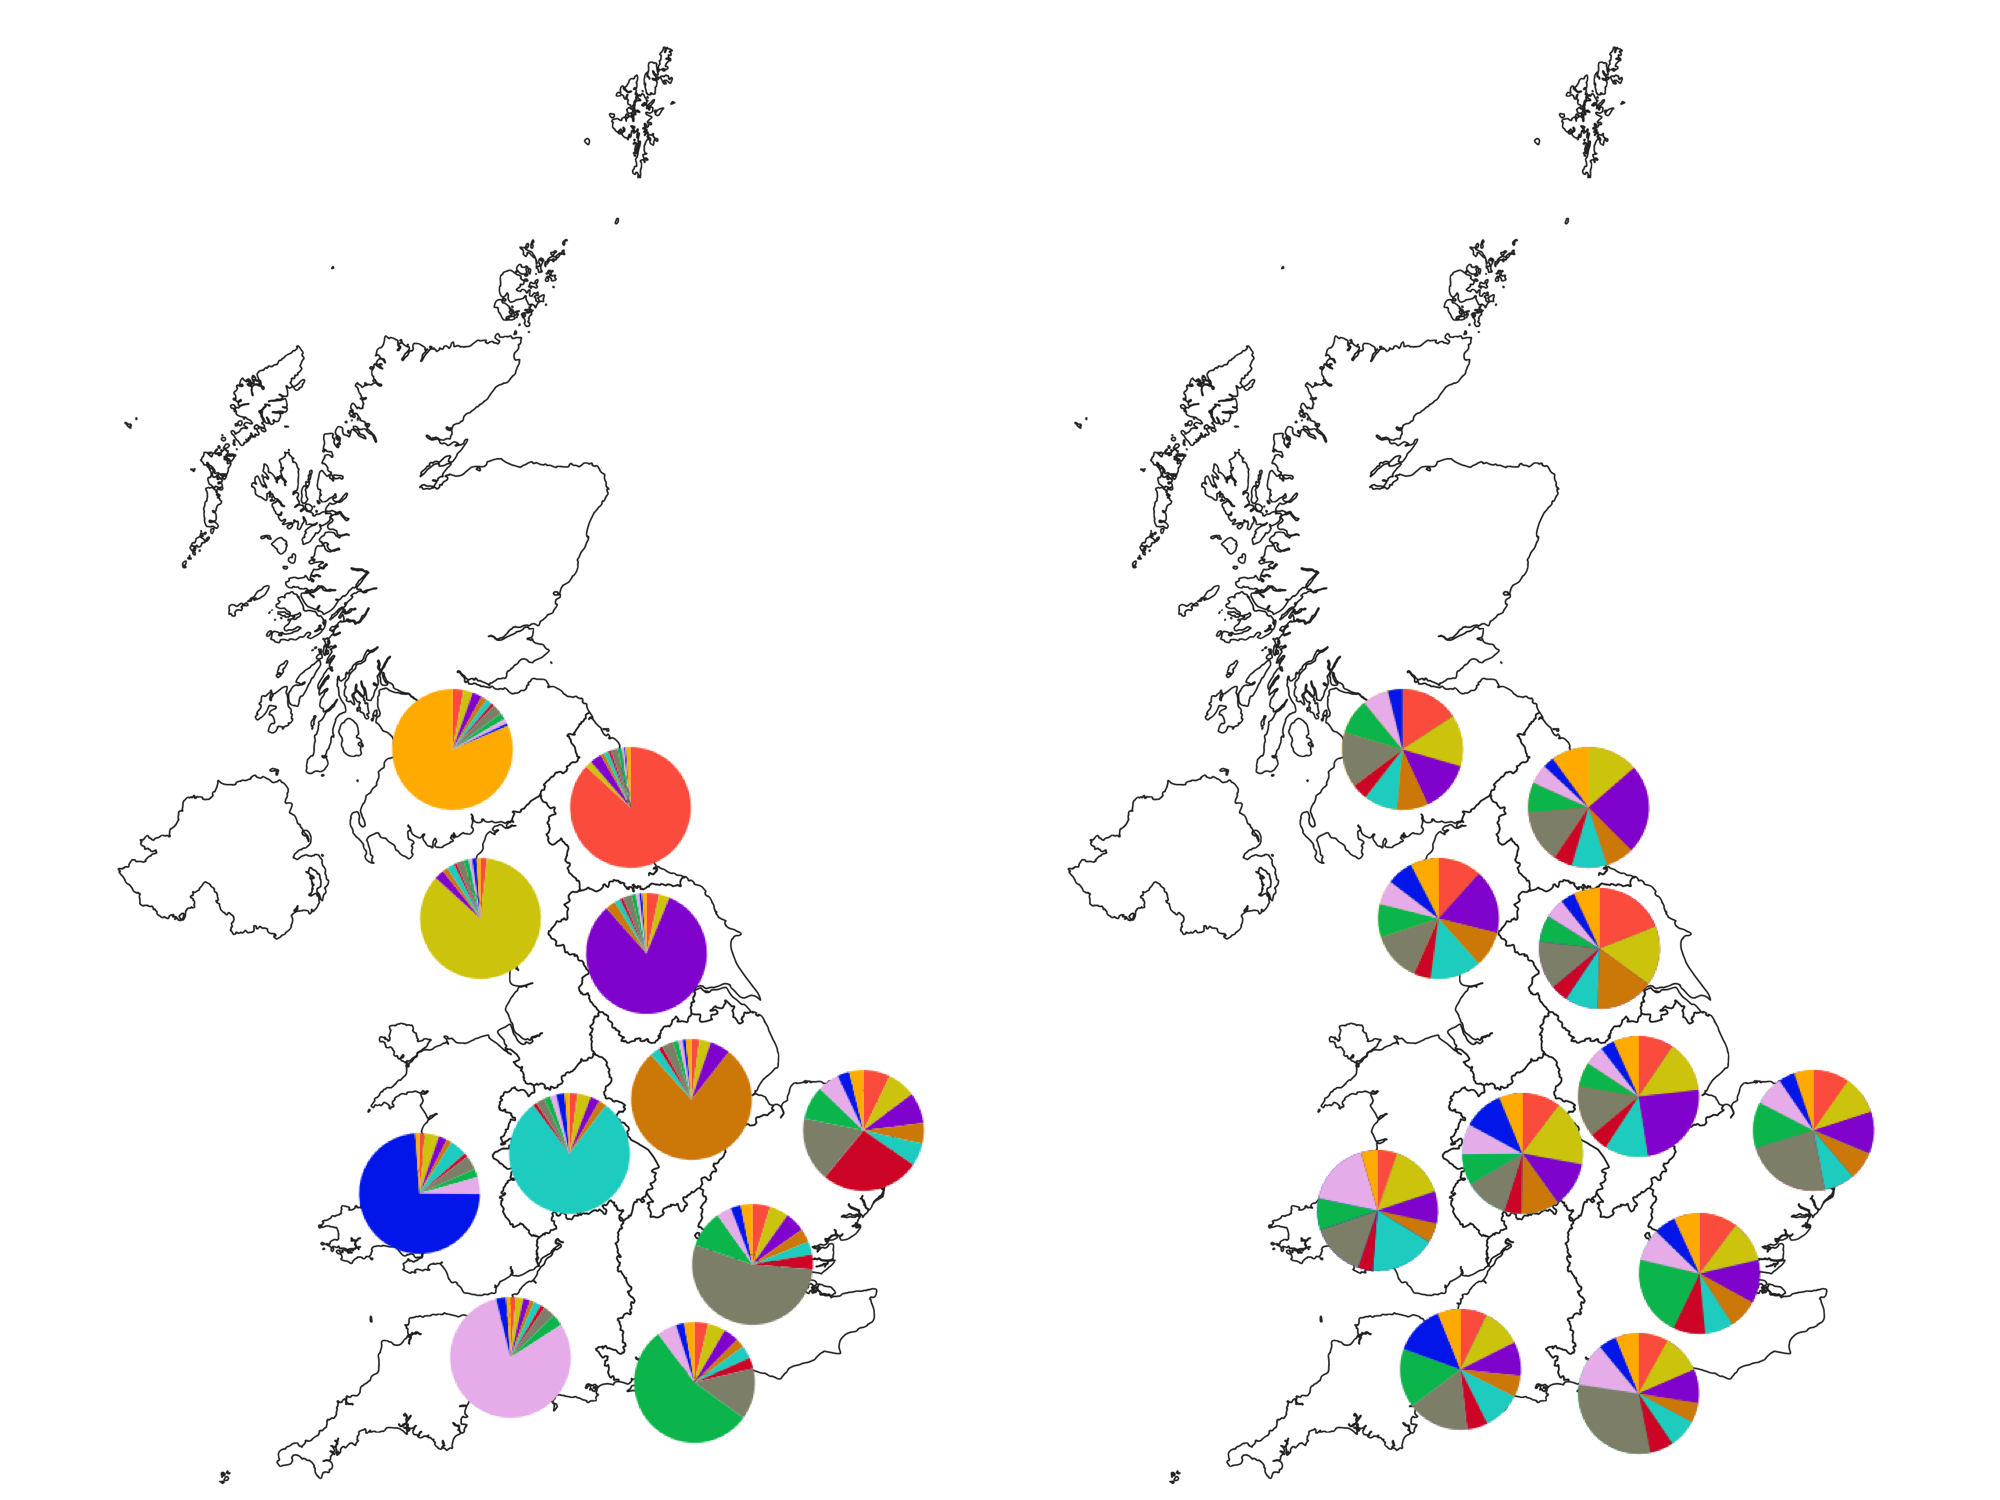

In [108]:
## example map from above: pob ... need to run por with pies!
Image(filename='../01_images_figures/pob_pieCharts_nuts1.png',width=600) 

### qgis CSV: nuts1,proportion of connections to all other nuts1 regions (unweighted, weighted)
Data is collected and saved to csv above. Load into dataframe to check out ... and to do columns, matrix, map.

### nuts1 connections matrix (unweighted, weighted) (pob, por)
Data is collected above

In [15]:
nuts1_props_pob = pd.read_csv('../00_csv_files/nuts1_kin_proportions_pob.csv')
nuts1_props_por = pd.read_csv('../00_csv_files/nuts1_kin_proportions_por.csv')
print(len(nuts1_props_por))
nuts1_props_por.head(5)

11


,nuts1,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,...,UKD_w,UKE_w,UKF_w,UKG_w,UKH_w,UKI_w,UKJ_w,UKK_w,UKL_w,UKM_w
0,UKC,0.751396,0.036103,0.064249,0.026992,0.019752,0.001311,0.024776,0.029363,0.018566,...,0.054290,0.086676,0.050694,0.035153,0.008443,0.058926,0.084155,0.032208,0.012369,0.035254
1,UKD,0.036664,0.699686,0.059448,0.030896,0.041797,0.001426,0.033210,0.037171,0.027189,...,0.628990,0.047759,0.040196,0.056704,0.006607,0.054074,0.071508,0.030548,0.016909,0.025399
2,UKE,0.066083,0.060209,0.652930,0.064991,0.026125,0.001187,0.033924,0.037968,0.026671,...,0.071116,0.528580,0.082195,0.037227,0.006358,0.062880,0.082927,0.034958,0.015291,0.027819
3,UKF,0.049604,0.055912,0.116126,0.592499,0.040658,0.002179,0.039741,0.040601,0.030565,...,0.057337,0.078738,0.566437,0.050243,0.011200,0.063555,0.074178,0.032720,0.014904,0.022311
4,UKG,0.035950,0.074909,0.046229,0.040266,0.667197,0.001306,0.032940,0.037540,0.030441,...,0.078737,0.034714,0.048909,0.621807,0.006081,0.052906,0.068368,0.032621,0.018496,0.018205


In [16]:
# check row sums ... should be 1
nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']

 
columns_to_get = nuts1 # unweighted
#columns_to_get = [x + '_w' for x in nuts1] # weighted
columns_to_get.insert(0,'nuts1')
m = nuts1_props_por[columns_to_get]

for n in nuts1[1:]:
    print(n, np.sum(m[m['nuts1']==n].values[0][1:]))
m

UKC 0.9999999999999999
UKD 0.9999999999999999
UKE 0.9999999999999999
UKF 0.9999999999999999
UKG 1.0
UKH 1.0
UKI 1.0
UKJ 1.0
UKK 0.9999999999999999
UKL 1.0
UKM 1.0


,nuts1,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,UKL,UKM
0,UKC,0.751396,0.036103,0.064249,0.026992,0.019752,0.001311,0.024776,0.029363,0.018566,0.008082,0.019409
1,UKD,0.036664,0.699686,0.059448,0.030896,0.041797,0.001426,0.033210,0.037171,0.027189,0.013309,0.019203
2,UKE,0.066083,0.060209,0.652930,0.064991,0.026125,0.001187,0.033924,0.037968,0.026671,0.011875,0.018037
3,UKF,0.049604,0.055912,0.116126,0.592499,0.040658,0.002179,0.039741,0.040601,0.030565,0.013476,0.018637
4,UKG,0.035950,0.074909,0.046229,0.040266,0.667197,0.001306,0.032940,0.037540,0.030441,0.017208,0.016015
5,UKH,0.127273,0.136364,0.112121,0.115152,0.069697,0.006061,0.142424,0.109091,0.124242,0.024242,0.033333
6,UKI,0.067834,0.089534,0.090303,0.059205,0.049551,0.004015,0.332678,0.145664,0.082102,0.029816,0.049295
7,UKJ,0.068711,0.085652,0.086382,0.051698,0.048266,0.002629,0.124498,0.373859,0.087915,0.032494,0.037897
8,UKK,0.032187,0.046414,0.044953,0.028833,0.028995,0.002218,0.051985,0.065130,0.647517,0.035108,0.016661
9,UKL,0.030204,0.048980,0.043149,0.027405,0.035335,0.000933,0.040700,0.051895,0.075685,0.631837,0.013878


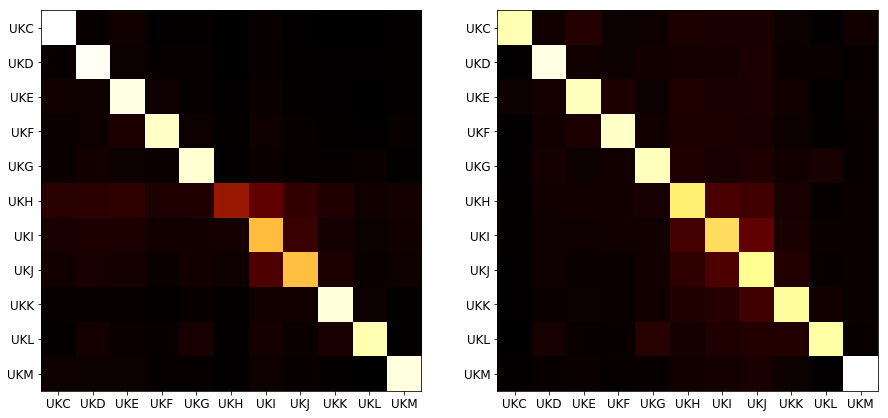

In [32]:
placeType = 'pob'

nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']

if placeType == 'pob':
    d = nuts1_props_pob
else:
    d = nuts1_props_por
 
fig,(ax,ax2) = plt.subplots(1,2,figsize=(15,8))
columns_to_get = nuts1 
m = d[columns_to_get]

ax.imshow(m,interpolation='nearest',cmap = 'afmhot')
ax.set_xticks(np.arange(np.shape(m)[0]))
ax.set_yticks(np.arange(np.shape(m)[1]))
ax.set_xticklabels(nuts1,fontsize=12)
ax.set_yticklabels(nuts1,fontsize=12)

columns_to_get = [x + '_w' for x in nuts1]
m = d[columns_to_get]
ax2.imshow(m,interpolation='nearest',cmap = 'afmhot')
ax2.set_xticks(np.arange(np.shape(m)[0]))
ax2.set_yticks(np.arange(np.shape(m)[1]))
ax2.set_xticklabels(nuts1,fontsize=12)
ax2.set_yticklabels(nuts1,fontsize=12)

fname = '../01_images_figures/' + placeType + '_nuts1_matrix.png'
plt.savefig(fname, format = 'png')

#plt.colorbar(im)
plt.show()

Have these saved as  
pob_nuts1_matrix.png  
por_nuts1_matrix.png  

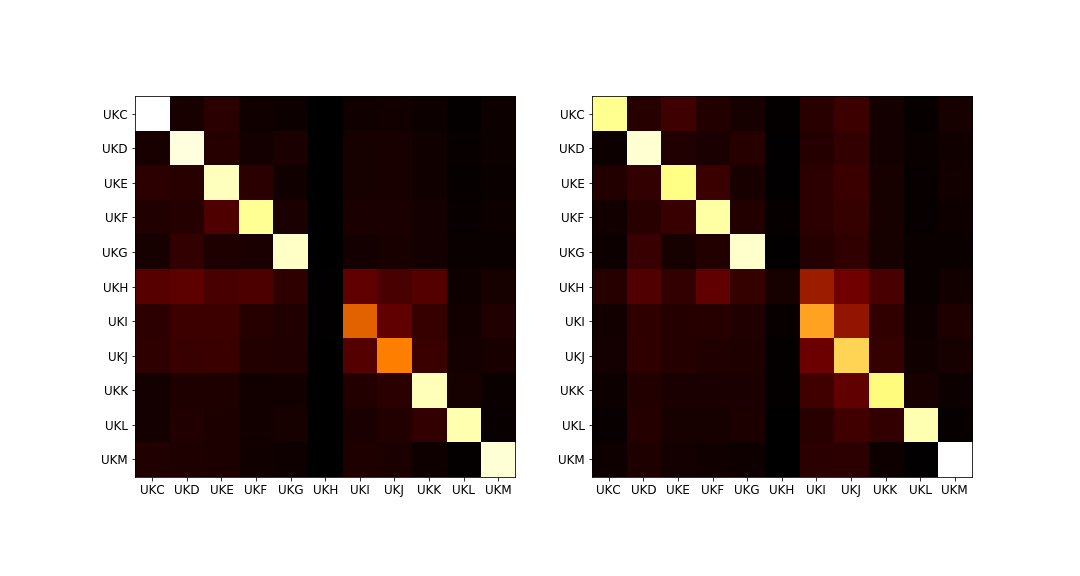

In [33]:
## example map from above: pob ... need to run por with pies!
Image(filename='../01_images_figures/por_nuts1_matrix.png',width=800) 

### column connections

In [34]:
def get_linewidth_and_color(connection_value, same_or_diff):
    
    if same_or_diff == 'diff':  
        cmap = cm.get_cmap('Greys')
        lw_multiplier = 1
        steps = np.arange(0.02,0.14, 0.02)
    else:
        cmap = cm.get_cmap('Greys')
        lw_multiplier = 4
        steps = np.arange(0.45,0.8,0.05)
        
    if connection_value < steps[0]:
        lw = 1 * lw_multiplier
        col = cmap(0.125)
    elif connection_value < steps[1]:
        lw = 2 * lw_multiplier
        col = cmap(0.25)
    elif connection_value < steps[2]:
        lw = 3 * lw_multiplier
        col = cmap(0.375)
    elif connection_value < steps[3]:
        lw = 4 * lw_multiplier
        col = cmap(0.5)
    elif connection_value < steps[4]:
        lw = 5 * lw_multiplier
        col = cmap(0.625)
    elif connection_value < steps[5]:
        lw = 6 * lw_multiplier
        col = cmap(0.75)
    else:
        lw = 7 * lw_multiplier
        col = cmap(0.875)
    return lw, col

In [35]:
nuts1_props_pob = pd.read_csv('../00_csv_files/nuts1_kin_proportions_pob.csv')
nuts1_props_por = pd.read_csv('../00_csv_files/nuts1_kin_proportions_por.csv')
print(len(nuts1_props_por))
nuts1_props_por.head(5)

11


,nuts1,UKC,UKD,UKE,UKF,UKG,UKH,UKI,UKJ,UKK,...,UKD_w,UKE_w,UKF_w,UKG_w,UKH_w,UKI_w,UKJ_w,UKK_w,UKL_w,UKM_w
0,UKC,0.751396,0.036103,0.064249,0.026992,0.019752,0.001311,0.024776,0.029363,0.018566,...,0.054290,0.086676,0.050694,0.035153,0.008443,0.058926,0.084155,0.032208,0.012369,0.035254
1,UKD,0.036664,0.699686,0.059448,0.030896,0.041797,0.001426,0.033210,0.037171,0.027189,...,0.628990,0.047759,0.040196,0.056704,0.006607,0.054074,0.071508,0.030548,0.016909,0.025399
2,UKE,0.066083,0.060209,0.652930,0.064991,0.026125,0.001187,0.033924,0.037968,0.026671,...,0.071116,0.528580,0.082195,0.037227,0.006358,0.062880,0.082927,0.034958,0.015291,0.027819
3,UKF,0.049604,0.055912,0.116126,0.592499,0.040658,0.002179,0.039741,0.040601,0.030565,...,0.057337,0.078738,0.566437,0.050243,0.011200,0.063555,0.074178,0.032720,0.014904,0.022311
4,UKG,0.035950,0.074909,0.046229,0.040266,0.667197,0.001306,0.032940,0.037540,0.030441,...,0.078737,0.034714,0.048909,0.621807,0.006081,0.052906,0.068368,0.032621,0.018496,0.018205


../01_images_figures/nuts1_connections_columns_pob.png


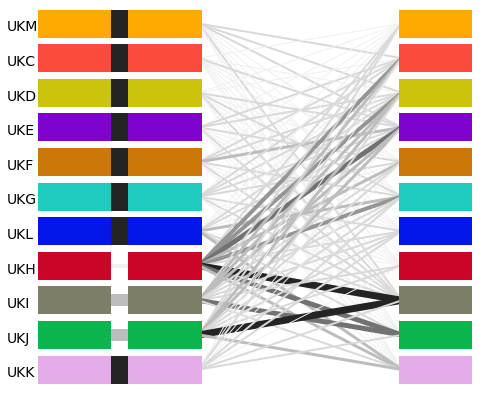

In [72]:
placeType = 'pob'
weighted = False

# specify order, top, to bottom
nuts1 = ['UKM','UKC','UKD','UKE','UKF','UKG','UKL','UKH','UKI','UKJ','UKK']

xxx, colDict = get_nuts1_colors()

if placeType == 'pob':
    d = nuts1_props_pob
else:
    d = nuts1_props_por

if weighted == True:
    columns_to_get = [x + '_w' for x in nuts1]
    placeType += '_weighted'
else:
    columns_to_get = nuts1

fname = '../01_images_figures/nuts1_connections_columns_' + placeType + '.png'    
    
m = d[['nuts1'] + columns_to_get]

# make dictionary of connection values
connections = {}
# iterate over rows, assign column values
rows = m['nuts1'].values
row_index = dict(zip(rows,m.index.tolist()))
cols = m.columns.tolist()[1:]

for r in rows:    
    # iterate over columns
    for c in cols:       
        col_nuts =  c.replace('_w','')

        connection = m[m['nuts1']==r][c].values[0]
        k = r + ',' + col_nuts
        connections[k] = connection

# setup y axis positions
ys = np.arange(5.5,0,-0.5)
ypos = dict(zip(nuts1,ys))

# draw columns
f,a = plt.subplots(1,1,figsize = (8,7))
numComps = len(nuts1)
ys = np.arange(1,numComps+1)

[x1,x2,x3,x4,x5,x6] = [1,2,3,4,9,10]
w = 28 # linewidth for colored regions

# draw connections
for n1 in nuts1: 
    c = colDict[n1]
    y = ypos[n1]
    for n2 in nuts1:
        y2 = ypos[n2]
        k = n1 + ',' + n2
        conn = connections[k]
        if n2 != n1:          
            
            # plot the n => n2 connection value                 
            lw, col = get_linewidth_and_color(conn,'diff')     
            a.plot([x4+0.25,x5-0.25],[y,y2],color=col, linewidth = lw)
            
        else:
            
            lw, col = get_linewidth_and_color(conn,'same') 
            a.plot([x2+0.3,x3-0.3],[y,y2],color=col, linewidth = lw)

# colored regions
for n in nuts1:
    c = colDict[n]
    y = ypos[n]
    a.plot([x1,x2],[y,y],color = c, linewidth = w)
    a.plot([x3,x4],[y,y],color = c, linewidth = w)
    a.plot([x5,x6],[y,y],color = c, linewidth = w)
    a.text(0,y-0.1,n,fontsize=14)            

plt.savefig(fname, format = 'png')
plt.axis('off')
print(fname)
plt.show()

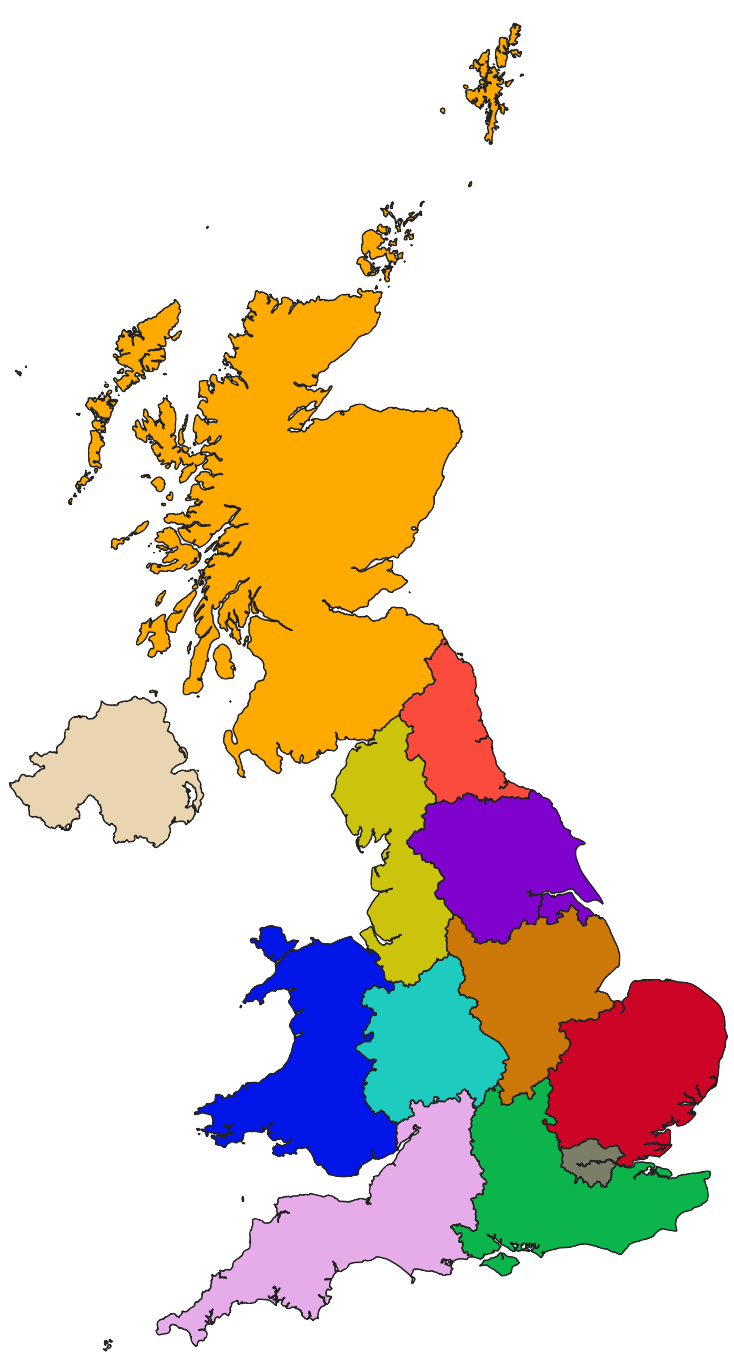

In [65]:
Image(filename='../01_images_figures/nuts1_color_code_map.png',width=250)

### map

In [40]:
centroids = pd.read_csv('../00_csv_files/nuts1_centroids.csv')
centroids

,X,Y,NUTS_ID,NUTS_NAME
0,406294.177291,569223.337055,UKC,North East (England)
1,353013.792259,461751.668628,UKD,North West (England)
2,450743.458406,452364.705629,UKE,Yorkshire and the Humber
3,480296.274210,337095.584610,UKF,East Midlands (England)
4,381704.551781,286827.770398,UKG,West Midlands (England)
5,573324.933398,264295.714506,UKH,East of England
6,531208.767022,179637.217083,UKI,London
7,502537.538208,154526.856816,UKJ,South East (England)
8,319488.205729,122922.782698,UKK,South West (England)
9,279854.826204,271791.586276,UKL,Wales


In [44]:
placeType = 'por'
weighted=True

if placeType == 'pob':
    d = nuts1_props_pob
else:
    d = nuts1_props_por

nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']

if weighted == True:
    columns_to_get = [x + '_w' for x in nuts1]
    placeType += '_weighted'
else:
    columns_to_get = nuts1
    
columns_to_get.insert(0,'nuts1')
m = d[columns_to_get]

ofile = 'nuts1_centroids_connections_' + placeType + '.csv'

o = open(ofile,'w')
o.write('nuts_reg_1,centroid_x_1,centroid_y_1,nuts_reg_2,centroid_x_2,centroid_y_2,kin_connection\n')
for region1 in m['nuts1'].values:
    centroid_x_1 = str(centroids[centroids.NUTS_ID==region1]['X'].values[0])
    centroid_y_1 = str(centroids[centroids.NUTS_ID==region1]['Y'].values[0])

    for region2 in m['nuts1'].values:
        centroid_x_2 = str(centroids[centroids.NUTS_ID==region2]['X'].values[0])
        centroid_y_2 = str(centroids[centroids.NUTS_ID==region2]['Y'].values[0])
        if weighted == True:
            region2 += '_w'
        connection = str(m[m['nuts1']==region1][region2].values[0])
        pair = ','.join(sorted([region1,region2]))
        if region1 != region2:
            o.write(','.join([region1,centroid_x_1,centroid_y_1,region2,centroid_x_2,centroid_y_2,connection])+'\n')
o.close()
m.head(11)

,nuts1,UKC_w,UKD_w,UKE_w,UKF_w,UKG_w,UKH_w,UKI_w,UKJ_w,UKK_w,UKL_w,UKM_w
0,UKC,0.541832,0.054290,0.086676,0.050694,0.035153,0.008443,0.058926,0.084155,0.032208,0.012369,0.035254
1,UKD,0.021305,0.628990,0.047759,0.040196,0.056704,0.006607,0.054074,0.071508,0.030548,0.016909,0.025399
2,UKE,0.050649,0.071116,0.528580,0.082195,0.037227,0.006358,0.062880,0.082927,0.034958,0.015291,0.027819
3,UKF,0.028377,0.057337,0.078738,0.566437,0.050243,0.011200,0.063555,0.074178,0.032720,0.014904,0.022311
4,UKG,0.019155,0.078737,0.034714,0.048909,0.621807,0.006081,0.052906,0.068368,0.032621,0.018496,0.018205
5,UKH,0.056058,0.111779,0.072235,0.132843,0.074089,0.033590,0.213222,0.154805,0.103747,0.018986,0.028647
6,UKI,0.028867,0.067502,0.052715,0.055620,0.047563,0.015733,0.396162,0.202483,0.067619,0.022289,0.043447
7,UKJ,0.030711,0.066497,0.051789,0.048359,0.045787,0.008509,0.150837,0.463585,0.073302,0.026252,0.034372
8,UKK,0.021249,0.051355,0.039466,0.038562,0.039494,0.010309,0.091061,0.132515,0.516730,0.037463,0.021796
9,UKL,0.015460,0.053856,0.032707,0.033278,0.042425,0.003574,0.056870,0.089915,0.070976,0.587647,0.013292


In [51]:
# make one file with the unison values for pob, pob_, por, por_w
fname = '../00_csv_files/nuts1_centroids_homevalues.csv'
o = open(fname,'w')
o.write('nuts1,pob,pob_w,por,por_w\n')

nuts1 = ['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM']

for n in nuts1:
    w = n + '_w'
    pobpob = nuts1_props_pob[nuts1_props_pob.nuts1 == n][n].values[0]
    pobpob_w = nuts1_props_pob[nuts1_props_pob.nuts1 == n][w].values[0]
    porpor = nuts1_props_por[nuts1_props_por.nuts1 == n][n].values[0]
    porpor_w = nuts1_props_por[nuts1_props_por.nuts1 == n][w].values[0]
    o.write(','.join([str(x) for x in [n,pobpob,pobpob_w,porpor,porpor_w]]) + '\n')
o.close()

#### Have these files to make map:
nuts1_centroids_connections_pob_weighted.csv  
nuts1_centroids_connections_pob.csv  
nuts1_centroids_connections_por_weighted.csv  
nuts1_centroids_connections_por.csv  
nuts1_centroids_homevalues.csv  

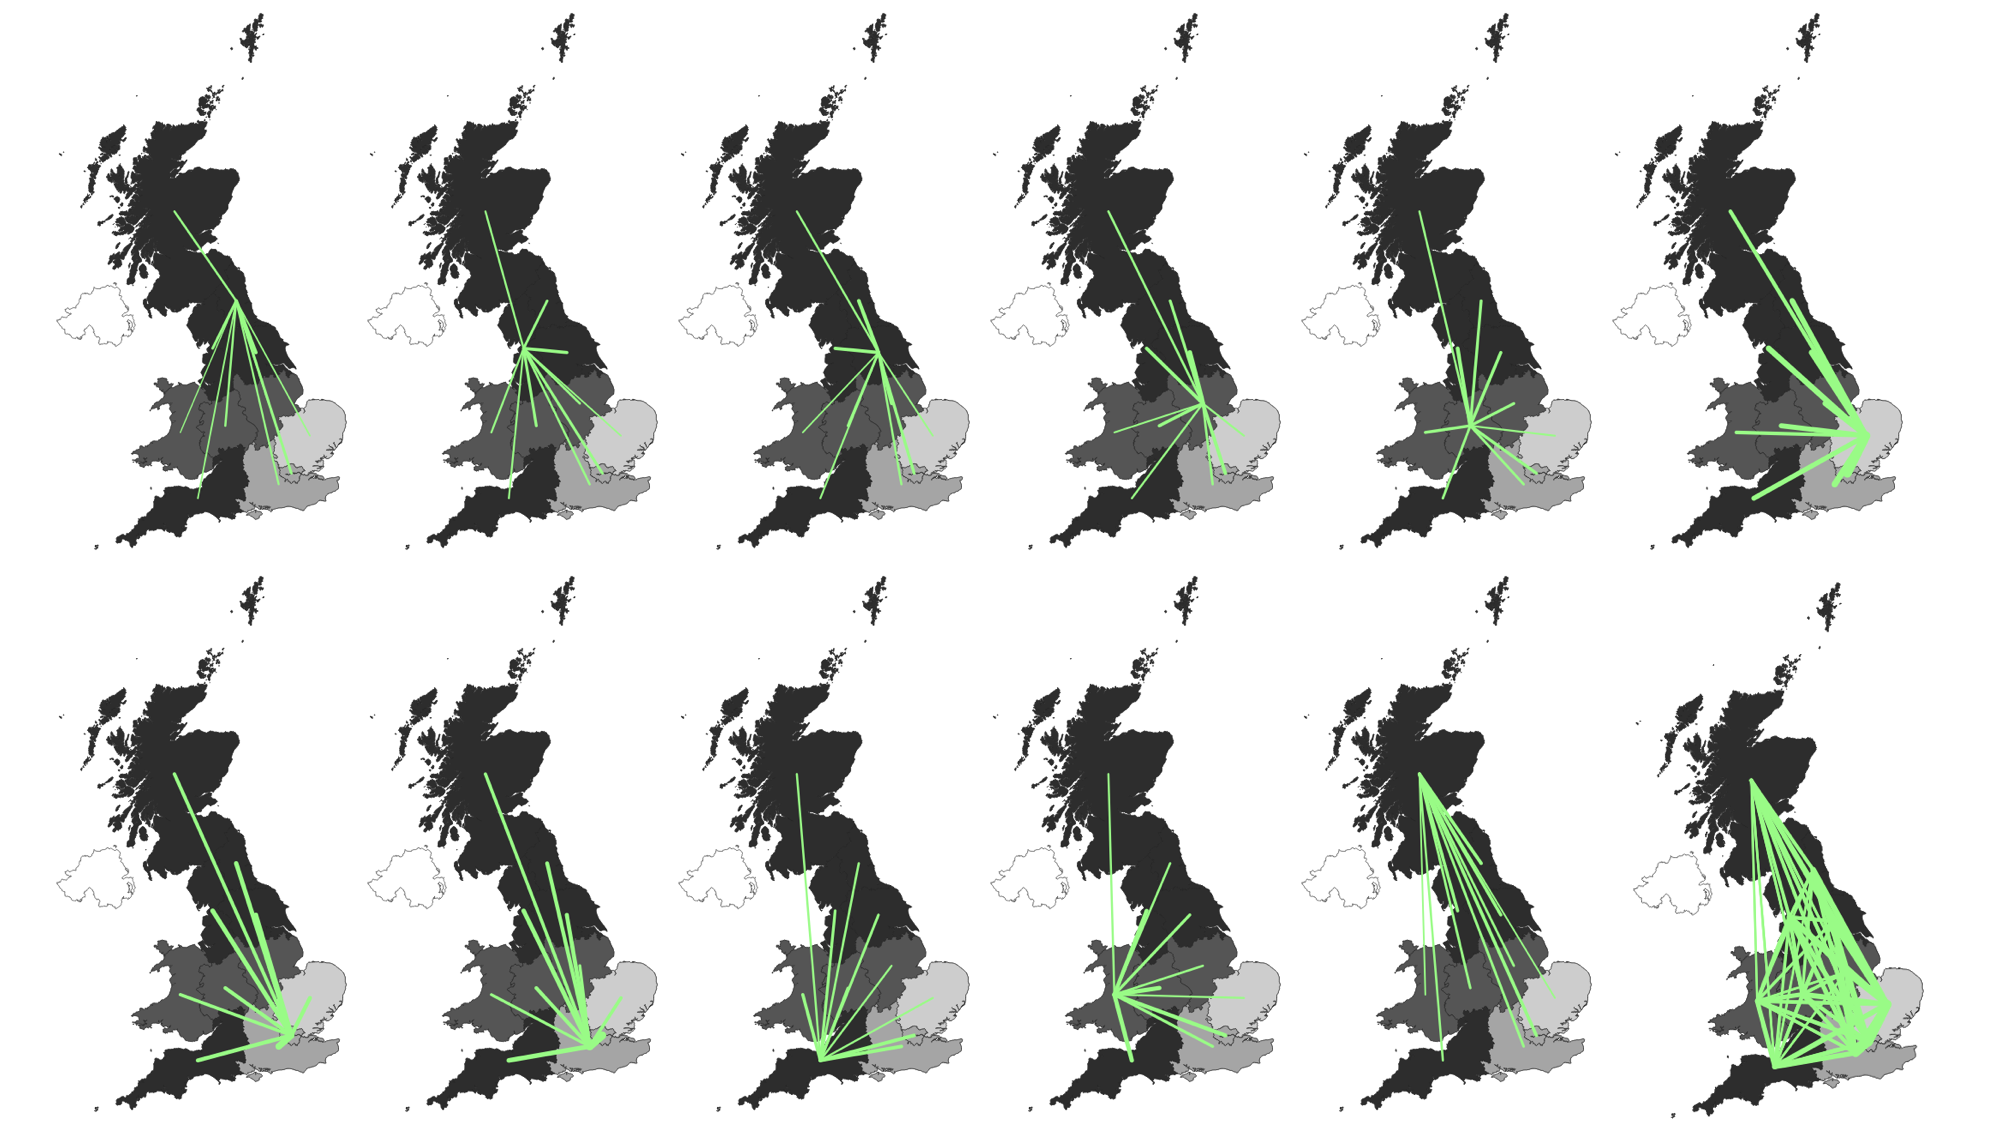

In [53]:
# pob unweighted
Image(filename='../01_images_figures/pob_nuts_connections_all.png',width=1200)